In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as pl

In [2]:
measurement_type = 'weak'
assert measurement_type in ['weak','proj'], print('measurement_type wrong')

setup = 'purification'
evolution_type = 'matchgate'
scrambling_type = 'matchgate'

In [3]:
root_direc = 'data_'+measurement_type+'_measurement/'+setup+'/'

root_direc = root_direc+scrambling_type+'_scrambling/'+evolution_type+'_evolution/'

In [4]:
print(os.listdir(root_direc))

['.DS_Store', 'L=16', 'L=18', 'L=10', 'L=6', 'L=8', 'figures', 'L=12', 'L=14']


In [31]:
def get_entropy(file):
    entropy = []
    for merged_file in os.listdir(file):
        with open(file+'/'+merged_file,'rb') as f:
            data = pickle.load(f)
            entropy.extend(data['entropy'])
    return entropy

def get_p(name:str):
    p = 0
    index2 = name.index('_BC')
    index1 = name.index('p=')
    p = float(name[index1+2:index2])
    return p

def get_T(name:str):
    index = name.index('_tscr')
    T = int(name[2:index])
    return T

In [45]:
entropy_dic = {}
for L_file in os.listdir(root_direc):
    if 'L=' not in L_file:
        continue
    L = int(L_file[2:])
    entropy_dic[L] = {}
    sub_dir = root_direc + '/' + L_file
    for p_file in os.listdir(sub_dir):
        if 'p=' not in p_file:
            continue
        p = get_p(p_file)
        
        # checking correct T
        T = get_T(p_file)
        if T!=4*L:
            continue

        merged_dir = sub_dir + '/' + p_file + '/' + 'merged_files'
        entropy_dic[L][p] = np.array(get_entropy(merged_dir))
        # the shape of entropy_dic[L][p] is (N,T,A) where N is the number of samples, T is the time steps, and A is the total number of intervals considerd. If the last axis index is a, then a=0 corresponds to interval (L,L+L_A), a=1 to (L-1,L+L_A) and so on
    
    if len(entropy_dic[L]) == 0:
        entropy_dic.pop(L,None)

8 dict_keys([0.1, 0.3, 0.2, 0.4])
600 32
10 dict_keys([0.2, 0.1])
300 40
12 dict_keys([0.2, 0.1])
300 48
14 dict_keys([0.1])
300 56


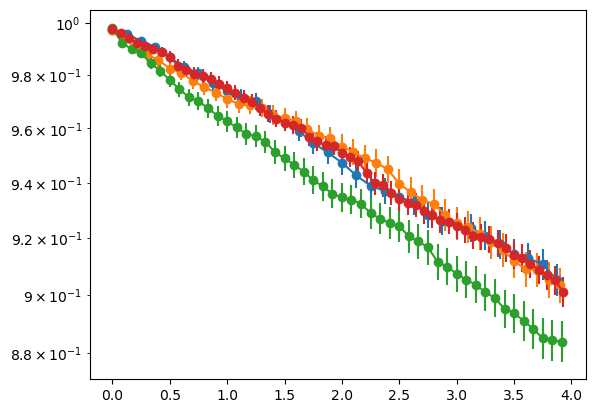

In [49]:
p = 0.1
for L in sorted(entropy_dic.keys()):
    if p not in entropy_dic[L]:
        continue
    print(L,entropy_dic[L].keys())
    ancilla_ent_index = 0
    raw_data = entropy_dic[L][p][:,:,ancilla_ent_index]
    T = raw_data.shape[1]
    N = raw_data.shape[0]
    print(N,T)
    xdata = np.arange(0,T,1)
    ydata = np.sum(raw_data,axis=0)/N
    yerr = np.std(raw_data,axis=0)/(N-1)**0.5
    
    pl.errorbar(xdata/L,ydata,yerr=yerr,ls='-',marker='o')

pl.yscale('log')